# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train['PREVIOUS_CARD_NUM_UTILIZED'].unique()

array([nan,  1.,  2.])

## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Высшее', 'Среднее специальное', 'Неоконченное высшее', 'Два и более высших образования', 'Ученая степень', 'Среднее', 'Неполное среднее'}


MARITAL_STATUS
{'Вдовец/Вдова', 'Не состоял в браке', 'Гражданский брак', 'Разведен(а)', 'Состою в браке'}


GEN_INDUSTRY
{nan, 'Туризм', 'Образование', 'СМИ/Реклама/PR-агенства', 'ЧОП/Детективная д-ть', 'Государственная служба', 'Сельское хозяйство', 'Сборочные производства', 'Салоны красоты и здоровья', 'Управляющая компания', 'Информационные услуги', 'Здравоохранение', 'Транспорт', 'Металлургия/Промышленность/Машиностроение', 'Нефтегазовая промышленность', 'Банк/Финансы', 'Маркетинг', 'Химия/Парфюмерия/Фармацевтика', 'Подбор персонала', 'Информационные технологии', 'Страхование', 'Развлечения/Искусство', 'Недвижимость', 'Строительство', 'Юридические услуги/нотариальные услуги', 'Энергетика', 'Коммунальное хоз-во/Дорожные службы', 'Логистика', 'Ресторанный бизнес/Общественное питание', 'Другие сферы', 'Наука', 'Торговля'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [246]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [15]:
Пропуски нужно удалять, если это не приводит к существенной потери информации, или заполнять какими-то значениями(среднее,медиана,константа). В нашем датасете имеет смысл удалить пропуски для 7 значений и для PREVIOUS_CARD_NUM_UTILIZED произвести замену пропусков на 0. 

SyntaxError: invalid syntax (<ipython-input-15-1ebc02406d4c>, line 1)

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [16]:
Есть.Категориальные признаки нужно преобразовывать в числовые. Есть кодировщики LabelEncoder,OneHotEncoder или можно заполнить числовые значения какими-то интерпретируемыми числами. Например, числом объектов, которые входят в категорию.

SyntaxError: invalid syntax (<ipython-input-16-6a0f6fbfdf70>, line 1)

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [275]:

def preproc_data(df_input):
    df_output = df_input.copy()

    ## Your Code Here
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    
    df_output['PERSONAL_INCOME']=df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT']=df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT']=df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT']=df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT']=df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
 
    df_output = df_output[~df_output['ORG_TP_FCAPITAL'].isnull()]
    df_output = df_output[~df_output['GEN_INDUSTRY'].isnull()]
    df_output = df_output[~df_output['GEN_TITLE'].isnull()]
    df_output = df_output[~df_output['JOB_DIR'].isnull()]
    df_output = df_output[~df_output['TP_PROVINCE'].isnull()]
    df_output = df_output[~df_output['WORK_TIME'].isnull()]
    df_output['PREVIOUS_CARD_NUM_UTILIZED']=df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0)
    
    list=[]
    for i in df_output: 
        if str(i)=="sample":
            continue
        if str(df_output[i].dtype) == 'object': 
            list.append(i)
            
    df_output = pd.get_dummies(df_output, columns=list)
    return df_output


In [276]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [277]:
from sklearn.model_selection import train_test_split
y = df_train_preproc['TARGET']
df_train_preproc = df_train_preproc.drop('TARGET', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_train_preproc, y, test_size=0.33, random_state=42)



#### Задание 5. Обучение и оценка качества разных моделей

In [278]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_preproc, y, test_size=0.3, random_state=42)

In [279]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
## Your Code Here
Tree = DecisionTreeClassifier()
Tree.fit(X_train, y_train)
predictTree = Tree.predict(X_test)
predict_probaTree = Tree.predict_proba(X_test)
predict_probaTree



array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [280]:
Forest = RandomForestClassifier()
Forest.fit(X_train, y_train)
predictForest = Forest.predict(X_test)
predict_probaForest = Forest.predict_proba(X_test)
predict_probaForest


array([[0.8, 0.2],
       [0.9, 0.1],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [0.5, 0.5],
       [0.8, 0.2]])

In [281]:
Logistic = LogisticRegression()
Logistic.fit(X_train, y_train)
predictLogistic= Logistic.predict(X_test)
predict_probaLogistic = Logistic.predict_proba(X_test)
predict_probaLogistic


D:\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


array([[0.92656362, 0.07343638],
       [0.91583216, 0.08416784],
       [0.83902957, 0.16097043],
       ...,
       [0.90546223, 0.09453777],
       [0.74373643, 0.25626357],
       [0.92250347, 0.07749653]])

In [282]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score
## Your Code Here
MetricFrame = pd.DataFrame([[precision_score(y_test, predictTree), 
                            recall_score(y_test, predictTree), accuracy_score(y_test, predictTree)]
                           ,[precision_score(y_test, predictTree), 
                            recall_score(y_test, predictForest), accuracy_score(y_test, predictForest)],
                            [precision_score(y_test, predictLogistic), 
                            recall_score(y_test, predictLogistic), accuracy_score(y_test, predictLogistic)]
                           ],
                          columns=["precision","recall","accuracy"]
                          )

MetricFrame

,precision,recall,accuracy
0,0.170132,0.179641,0.791206
1,0.170132,0.005988,0.875706
2,1.000000,0.001996,0.877180


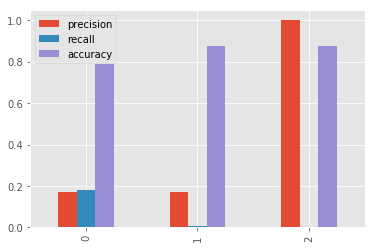

In [283]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает
MetricFrame.plot(kind='bar');

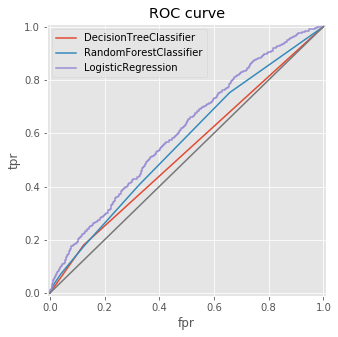

In [284]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

## Your Code Here
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, predict_probaTree[:,1])
fpr1, tpr1, thresholds1 = roc_curve(y_test, predict_probaForest[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, predict_probaLogistic[:,1])
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='DecisionTreeClassifier')
plt.plot(fpr1, tpr1, label='RandomForestClassifier')
plt.plot(fpr2, tpr2, label='LogisticRegression')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)

plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

plt.legend()
plt.show()

In [285]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
## Your Code Here
dtc = DecisionTreeClassifier()
cross_val_score(
    dtc,
    df_train_preproc,
    y,
    scoring='roc_auc',
    cv=10
)


array([0.52863776, 0.50159002, 0.52560118, 0.51463351, 0.52144223,
       0.52520521, 0.51415038, 0.51588369, 0.51851852, 0.53502285])

In [286]:
roc_auc_score(y_test, predict_probaTree[:,1])

0.5283357654439022

In [287]:
rfc = RandomForestClassifier()
cross_val_score(
    rfc,
    df_train_preproc,
    y,
    scoring='roc_auc',
    cv=10
)


array([0.56882866, 0.53984503, 0.55509732, 0.56500657, 0.57707997,
       0.55189967, 0.56438647, 0.56796764, 0.55756724, 0.55604658])

In [288]:
roc_auc_score(y_test, predict_probaForest[:,1])

0.5627968153329196

In [289]:
lr = LogisticRegression()
cross_val_score(
    lr,
    df_train_preproc,
    y,
    scoring='roc_auc',
    cv=10
)


array([0.62471074, 0.60347067, 0.62375232, 0.65139561, 0.61638077,
       0.53688761, 0.60087064, 0.66412647, 0.6130301 , 0.59434624])

In [290]:
roc_auc_score(y_test, predict_probaLogistic[:,1])

0.6044163773293749

In [291]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки
y = df_test_preproc['TARGET']
df_test_preproc = df_test_preproc.drop('TARGET', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_test_preproc, y, test_size=0.3, random_state=42)
Logistic = LogisticRegression()
Logistic.fit(X_train, y_train)
predict=Logistic.predict(X_test)
predict_proba = Logistic.predict_proba(X_test)
predict_proba


D:\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


array([[0.93304391, 0.06695609],
       [0.91666745, 0.08333255],
       [0.74927399, 0.25072601],
       ...,
       [0.91910426, 0.08089574],
       [0.85400484, 0.14599516],
       [0.86073815, 0.13926185]])

In [292]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)
roc_auc_score(y_test, predict_proba[:,1])

0.6417312521126081

In [293]:
lr = LogisticRegression()
cross_val_score(
    lr,
    df_test_preproc,
    y,
    scoring='roc_auc',
    cv=10
)

array([0.59101291, 0.56808943, 0.60121742, 0.6350264 , 0.59856676,
       0.55154353, 0.66082776, 0.5674451 , 0.59026001, 0.58103382])

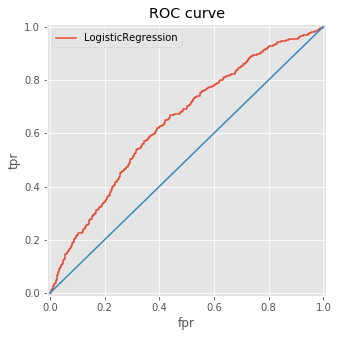

In [294]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, predict_proba[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr2, tpr2, label='LogisticRegression')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)

plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

plt.legend()
plt.show()

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [ ]:
### И далее ;)
